### Financial time series in practice
In this notebook, we will discuss about Resampling and OLS Regression using a file that contains end-of-day (EOD) data for different financial instruments as retrieved from the Thomson Reuters Eikon Data API.

**Data Import**

pandas provides a number of different functions and DataFrame methods to import data stored in different formats (CSV, SQL, Excel, etc.). The following code uses the pd.read_csv() function to import the time series data set from the CSV file:

In [6]:
filename = '../Data/tr_eikon_eod_data.csv'

In [8]:
f = open(filename, 'r')
f.readlines()[:5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n']

In [13]:
import pandas as pd
data = pd.read_csv(filename,
                   index_col=0,#first col handled as an index
                   parse_dates=True #index values are of type datetime
                  )

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  1972 non-null   float64
 1   MSFT.O  1972 non-null   float64
 2   INTC.O  1972 non-null   float64
 3   AMZN.O  1972 non-null   float64
 4   GS.N    1972 non-null   float64
 5   SPY     1972 non-null   float64
 6   .SPX    1972 non-null   float64
 7   .VIX    1972 non-null   float64
 8   EUR=    1972 non-null   float64
 9   XAU=    1972 non-null   float64
 10  GDX     1972 non-null   float64
 11  GLD     1972 non-null   float64
dtypes: float64(12)
memory usage: 200.3 KB


At this stage, a financial analyst probably takes a first look at the data, either by
inspecting or visualizing it:

In [18]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [20]:
data.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2017-10-25,156.41,78.63,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.41,78.76,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.05,83.81,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90
2017-10-30,166.72,83.89,44.37,1110.85,240.89,256.75,2572.83,10.50,1.1649,1275.86,22.76,121.13
2017-10-31,169.04,83.18,45.49,1105.28,242.48,257.15,2575.26,10.18,1.1644,1271.20,22.48,120.67


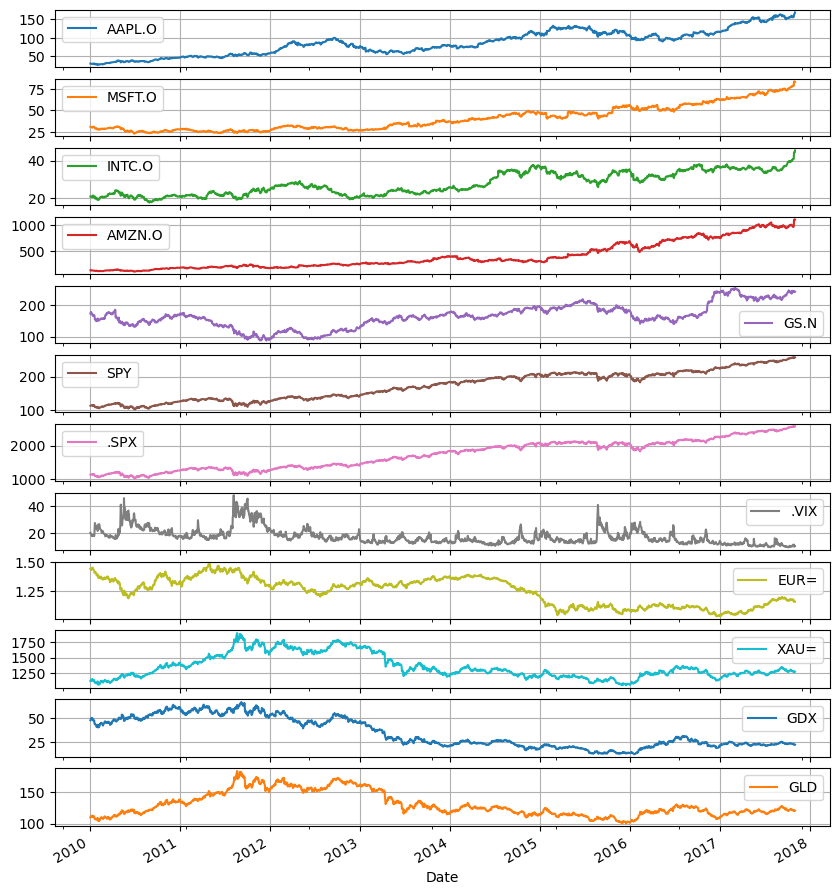

In [30]:
 data.plot(figsize=(10, 12), subplots=True, grid=True);

The data used is from the Thomson Reuters (TR) Eikon Data API. In the TR world symbols for financial instruments are called Reuters Instrument Codes (RICs). The financial instruments that the single RICs represent are:

In [33]:
instruments = ['Apple Stock', 'Microsoft Stock',
                           'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
                           'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
                           'VIX Volatility Index', 'EUR/USD Exchange Rate',
                           'Gold Price', 'VanEck Vectors Gold Miners ETF',
                           'SPDR Gold Trust']

In [35]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


A few additional info regarding the data:

In [40]:
info_data = pd.read_csv('../Data/Tickers.csv',
                   index_col=0)
info_data

,Ticker,Meaning,Notes
Category,,,
U.S. Company Stocks,AAPL.O,Apple Inc.,NASDAQ-listed ('.O')
U.S. Company Stocks,MSFT.O,Microsoft Corp.,NASDAQ-listed ('.O')
U.S. Company Stocks,INTC.O,Intel Corp.,NASDAQ-listed ('.O')
U.S. Company Stocks,AMZN.O,Amazon.com Inc.,NASDAQ-listed ('.O')
U.S. Company Stocks,GS.N,Goldman Sachs Group Inc.,NYSE-listed ('.N')
Indices and ETFs,SPY,SPDR S&P 500 ETF Trust,ETF tracking S&P 500
Indices and ETFs,.SPX,S&P 500 Index,Index (dot prefix)
Indices and ETFs,.VIX,CBOE Volatility Index,Market volatility gauge (index)
Currencies and Commodities,EUR=,EUR/USD,"Currency pair (FX, '=' suffix)"


### Percent Change


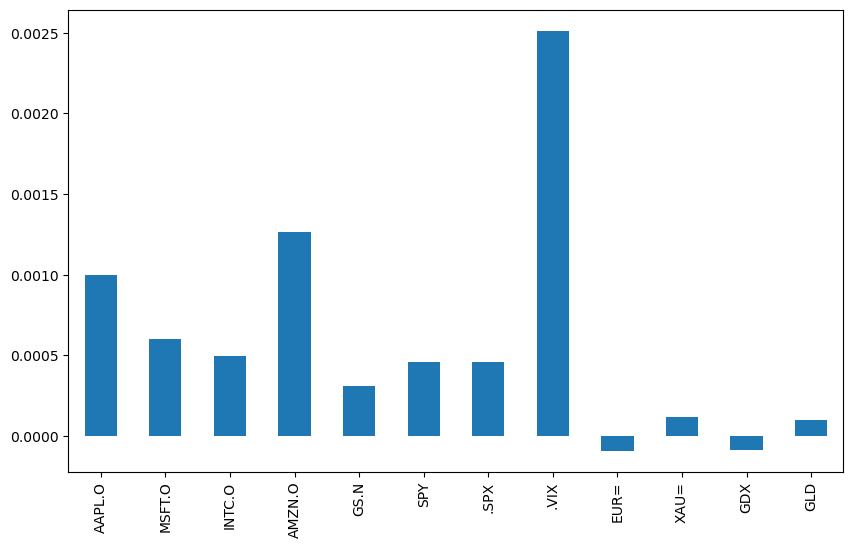

In [43]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In some scenarios, log returns are easier to handle and therefore often preferred in a financial context. Let us shows the cumulative log returns for the single financial time series. This type of plot leads to some form of normalization:

In [48]:
import numpy as np
rets = np.log(data / data.shift(1))

View a few top log returns rounded to 3 dp:

In [51]:
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.050,0.007,0.004,0.015,0.005


Plots the cumulative log returns over time; first the cumsum() method is called, then np.exp() is applied to the results:

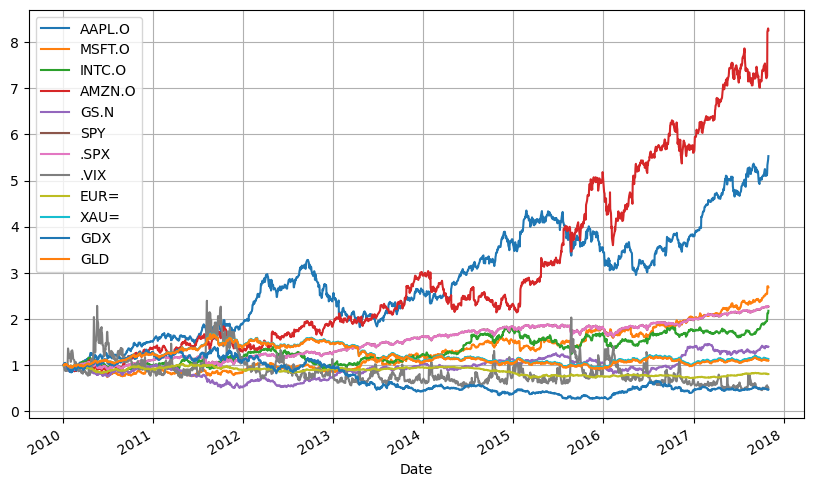

In [56]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6), grid=True);

**Interpretation**
If you started with $1:
Each line shows how that $1 would evolve given the series of log returns.
A value of 2.5 means your investment grew by 150% (final value = $2.50).

**Interpretation**

If you started with \$1:
- Each line shows how that \$1 would evolve given the series of log returns.
- A value of 2.5 means your investment grew by 150% (final value = \$2.50).

### Resampling 

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations:

In [68]:
data.resample('W', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


Let us plot the cumulative log returns over time: first, the cumsum() method is called, then np.exp() is applied to the results; finally, the resampling takes place:

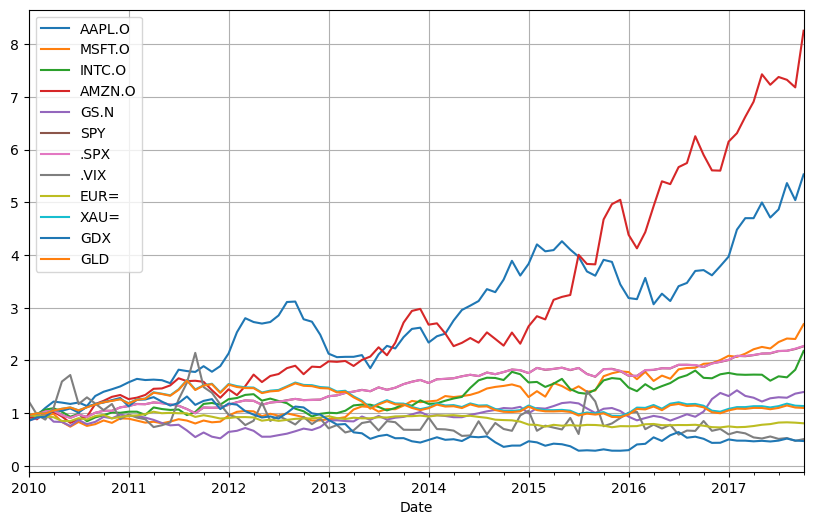

In [78]:
 rets.cumsum().apply(np.exp).resample('ME', label='right').last(
                                   ).plot(figsize=(10, 6), grid=True);

### A Technical Analysis Example

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame object.


In [81]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


Calculate the short and long terms SMAs:

In [84]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()

Visualizes the stock price data plus the two SMA time series:

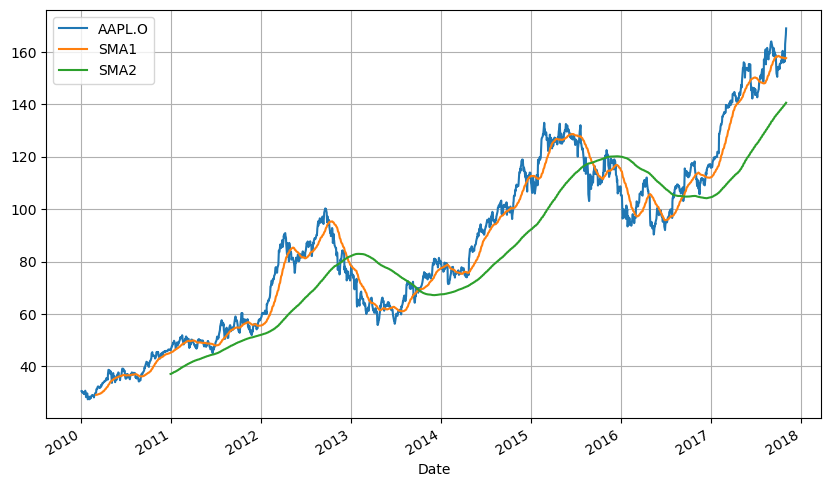

In [90]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6), grid=True);

In this context, the SMAs are only a means to an end. They are used to derive positions to implement a trading strategy. In the next figure we visualize a long position by a value of 1 and a short position by a value of -1. The change in the position is triggered (visually) by a crossover of the two lines representing the SMA time series:

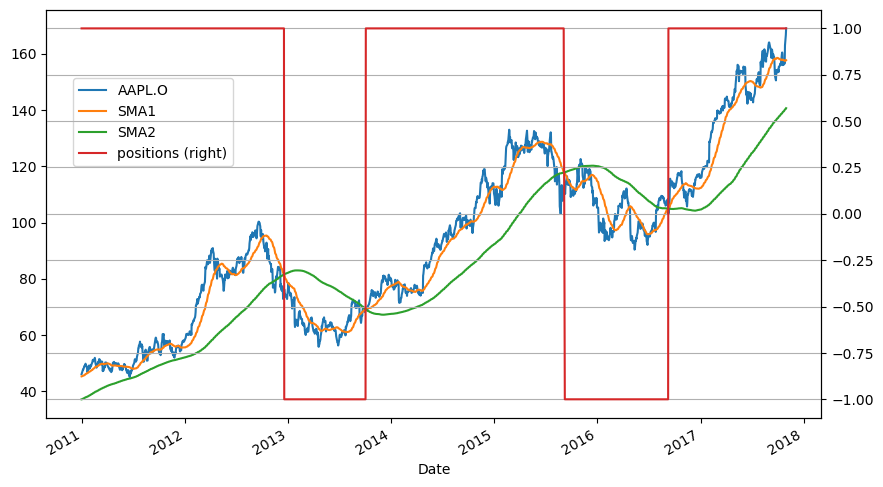

In [103]:
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6), grid=True,secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

The trading strategy implicitly derived here only leads to a few trades per se: only when the position value changes (i.e., a crossover happens) does a trade take place. Including opening and closing trades, this would add up to just six trades in total.

### Correlation Analysis


As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index. It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated. 

**The Data**

**The Data**

In [111]:
raw = pd.read_csv('../Data/tr_eikon_eod_data.csv',
                              index_col=0, parse_dates=True)
data = raw[['.SPX', '.VIX']].dropna()

In [141]:
data.head()

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13


Create a plot of the data:

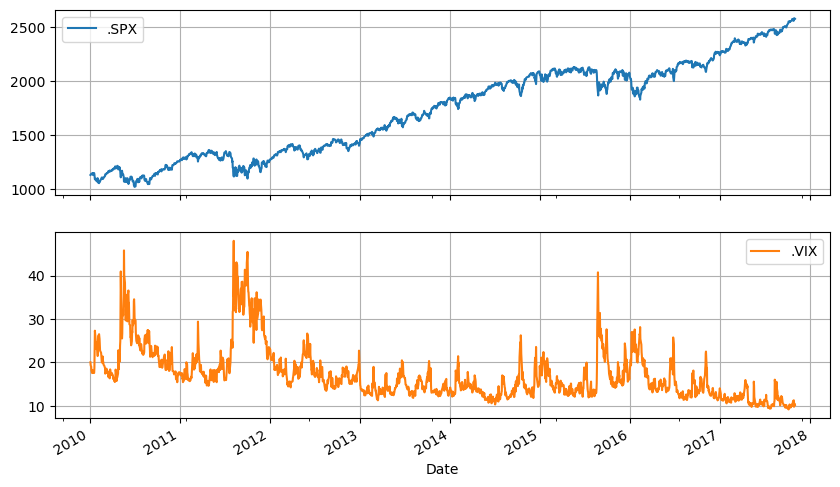

In [118]:
data.plot(subplots=True, figsize=(10, 6), grid=True);

When plotting (parts of) the two time series in a single plot and with adjusted scalings, the stylized fact of negative correlation between the two indices becomes evident through simple visual inspection:

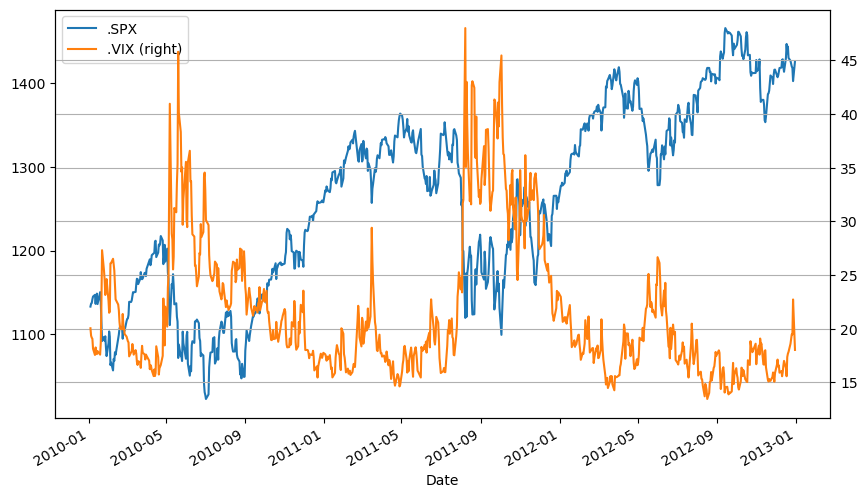

In [125]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', grid=True,figsize=(10, 6));

**Logarithm Returns**


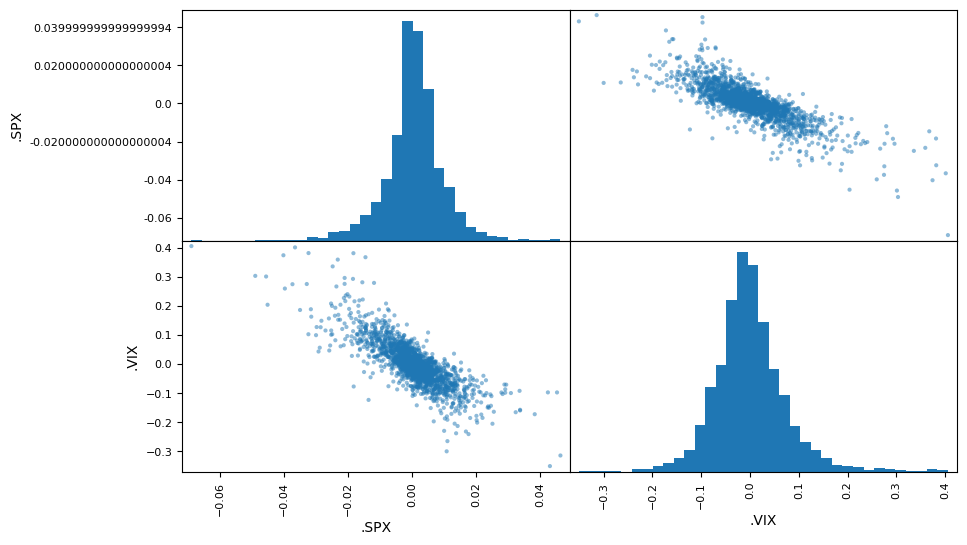

In [136]:
rets = np.log(data / data.shift(1))
pd.plotting.scatter_matrix(rets,
                           alpha=0.5,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6));

**Linear Regression**

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement. The figure below shows a scatter plot of the log returns and the linear regression line through the cloud of dots. The slope is obviously negative, providing support for the stylized fact about the negative correlation between the two indices:

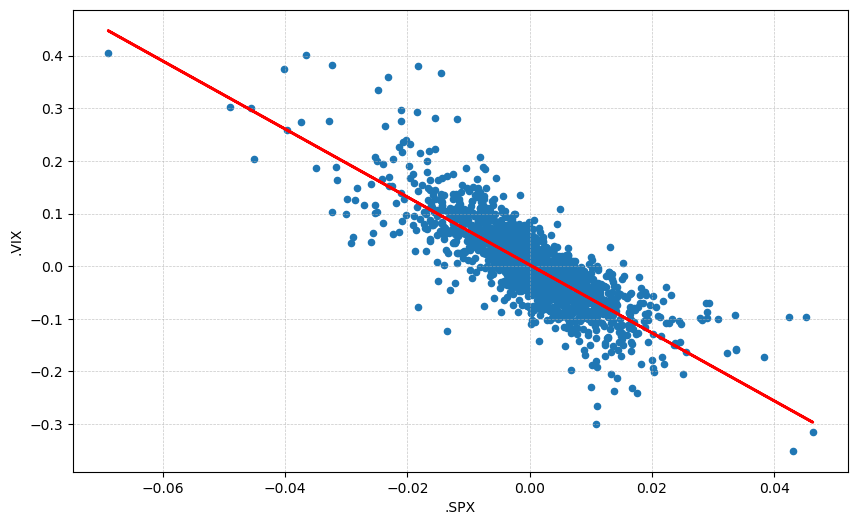

In [155]:
rets.dropna(inplace=True)
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7);

Get the summary of the model:

In [162]:
slope, intercept = reg
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

Slope: -6.4534
Intercept: 0.0023


**Note:** NumPy’s polyfit() does not produce a summary (no R², p-values, standard errors, etc.).
It’s purely numerical — it just finds the best-fit line.